# Matrix Multiplication from foundations

## Get Data

In [ ]:
import pickle, gzip, os
from pathlib import Path
import json, torch
from itertools import islice
from torch import tensor
import random
from matplotlib import pyplot as plt
from fastcore.test import test_close
from numba import njit
import numpy as np
import math

In [ ]:
if 'google.colab' in str(get_ipython()):
  path = Path('fashion_mnist/')
else:
  path = Path('../../data/fashion_mnist/')

In [ ]:
os.listdir(path)

['t10k-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz']

In [ ]:
# taken from https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
class_mapping = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
X_train, Y_train = load_mnist(path)
X_test, Y_test = load_mnist(path, 't10k')

X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [ ]:
lst1 = list(X_train[0])
vals = lst1[200: 210]
vals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00392156862745098,
 0.0,
 0.27058823529411763]

In [ ]:
vals_iter = iter(vals)

In [ ]:
next(vals_iter)

0.0

In [ ]:
def chunks(lst, sz):
    for i in range(0, len(lst), sz):
        yield lst[i: i + sz]

In [ ]:
vals_chunks = chunks(vals, 5)

In [ ]:
next(vals_chunks)

[0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
next(vals_chunks)

[0.0, 0.0, 0.00392156862745098, 0.0, 0.27058823529411763]

<matplotlib.image.AxesImage>

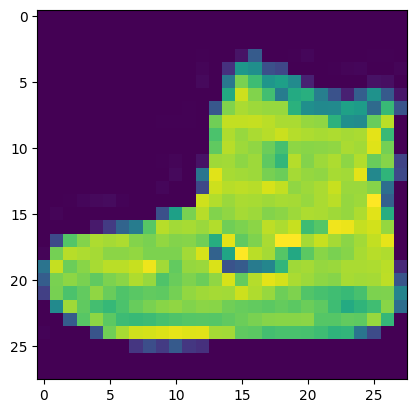

In [ ]:
plt.imshow(list(chunks(lst1, 28)))

In [ ]:
Y_train[0], class_mapping[Y_train[0]]

(9, 'Ankle boot')

In [ ]:
vals_iter = iter(vals)

In [ ]:
list(islice(vals_iter, 5))

[0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
it = iter(lst1)

<matplotlib.image.AxesImage>

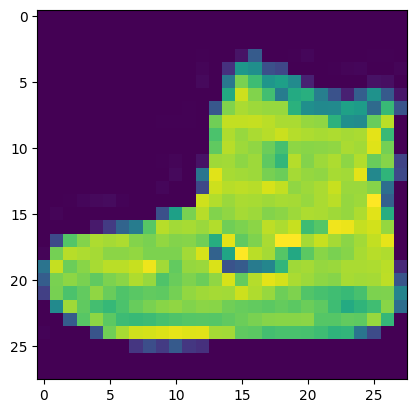

In [ ]:
plt.imshow(list(iter(lambda: list(islice(it, 28)), [])))

## Random Number

In [ ]:
rnd_state = None

def seed(x):
    global rnd_state
    x, a = divmod(x, 30326)
    x, b = divmod(x, 30327)
    x, c = divmod(x, 30328)
    rnd_state = int(a) + 1, int(b) + 1, int(c) + 1

In [ ]:
def rand():
    global rnd_state
    a, b, c = rnd_state
    x = (172 * a) % 30327
    y = (171 * b) % 30328
    z = (170 * c) % 30329
    rnd_state = x, y, z

    return (x / 30327 + y / 30328 + z / 30329) % 1.0

In [ ]:
seed(879828)

In [ ]:
rand(), rand(), rand()

(0.3015735034453595, 0.6902815800191595, 0.8979090043518492)

[<matplotlib.lines.Line2D>]

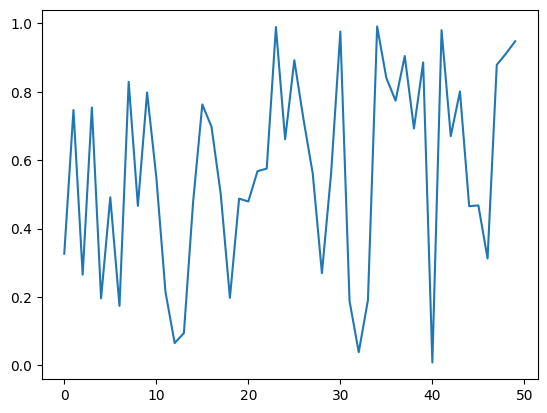

In [ ]:
plt.plot([rand() for _ in range(50)])

(array([ 9911., 10047.,  9879.,  9924., 10184.,  9979.,  9943., 10164.,
        10059.,  9910.]),
 array([5.26005285e-06, 1.00004091e-01, 2.00002923e-01, 3.00001754e-01,
        4.00000585e-01, 4.99999417e-01, 5.99998248e-01, 6.99997079e-01,
        7.99995911e-01, 8.99994742e-01, 9.99993573e-01]),
 <BarContainer object of 10 artists>)

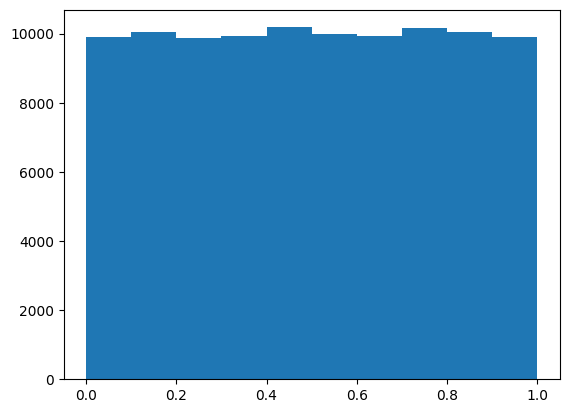

In [ ]:
plt.hist([rand() for _ in range(100_000)])

In [ ]:
if os.fork(): print(f'In parent {rand()}')
else:
    print(f'In child {rand()}')
    os._exit(os.EX_OK)

In parent 0.9651230962275226


In [ ]:
if os.fork(): print(f'In parent {torch.rand(1)}')
else:
    print(f'In child {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent tensor([0.1955])
In child tensor([0.1955])


In [ ]:
if os.fork(): print(f'In parent {random.random()}')
else:
    print(f'In child {random.random()}')
    os._exit(os.EX_OK)

In parent 0.1996222936679456
In child 0.5101572296608223


## Matrix and Tensor

In [ ]:
X_train[100][121]

0.6823529411764706

In [ ]:
class Matrix:
    def __init__(self, xs):
        self.xs = xs
    def __getitem__(self, idxs):
        return self.xs[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(X_train)

In [ ]:
m[100, 121]

0.6823529411764706

In [ ]:
imgs = tensor(X_train); imgs[100][121]

tensor(0.6824, dtype=torch.float64)

In [ ]:
imgs.dtype

torch.float64

In [ ]:
imgs = imgs.reshape(-1, 28, 28)

<matplotlib.image.AxesImage>

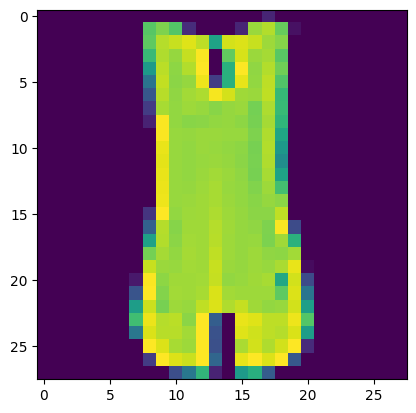

In [ ]:
plt.imshow(imgs[4])

In [ ]:
class_mapping[Y_train[4]]

'T-shirt/top'

In [ ]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

5.96 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 torch.randn(784, 10)

134 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix Multiplication

In [ ]:
m1 = X_train[:5]; m1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
m2 = torch.randn(784, 10); m2.shape

torch.Size([784, 10])

In [ ]:
ar, ac = m1.shape
br, bc = m2.shape

c = torch.zeros(ar, bc)

for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            c[i, j] += (m1[i, k] * m2[k, j])


In [ ]:
c.shape

torch.Size([5, 10])

In [ ]:
def matmul(a, b):
    ar, ac = m1.shape
    br, bc = m2.shape

    c = torch.zeros(ar, bc)

    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i, j] += (m1[i, k] * m2[k, j])

    return c

In [ ]:
t = matmul(m1, m2); t.shape

torch.Size([5, 10])

In [ ]:
%time _=matmul(m1, m2)

CPU times: user 989 ms, sys: 2.23 ms, total: 991 ms
Wall time: 997 ms


In [ ]:
5*10*784

39200

## Matrix Multiplication using numba

In [ ]:
@njit
def dot(a, b):
    res = 0
    for i in range(len(a)):
        res += a[i] * b[i]
    return res

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [ ]:
%time dot(a, b)

CPU times: user 440 ms, sys: 153 ms, total: 593 ms
Wall time: 614 ms


32

In [ ]:
%time dot(a, b)

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 14.8 µs


32

In [ ]:
m1[0, :].shape

(784,)

In [ ]:
m2[:, 0].shape

torch.Size([784])

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = dot(a[i,:], b[:, j])
    return c

In [ ]:
%time _=matmul(m1, m2.numpy())

CPU times: user 87.9 ms, sys: 0 ns, total: 87.9 ms
Wall time: 93.8 ms


In [ ]:
test_close(t, matmul(m1, m2.numpy()), eps=1e-4)

## Matrix Multiplication using element wise operation

In [ ]:
m1 = torch.tensor(m1).float()

In [ ]:
m1[0, :].shape, m2[:, 0].shape

(torch.Size([784]), torch.Size([784]))

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = (a[i, :] * b[:, j]).sum()
    return c

In [ ]:
%time _=matmul(m1, m2)

CPU times: user 3.18 ms, sys: 31 µs, total: 3.21 ms
Wall time: 6.33 ms


In [ ]:
test_close(t, matmul(m1, m2), eps=1e-4)

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = torch.dot(a[i, :], b[:, j])
    return c

In [ ]:
%time _=matmul(m1, m2)

CPU times: user 2.86 ms, sys: 0 ns, total: 2.86 ms
Wall time: 2.79 ms


In [ ]:
test_close(t, matmul(m1, m2), eps=1e-4)

## Matrix Multiplication using broadcasting

In [ ]:
c = tensor([10, 20, 30]); c

tensor([10, 20, 30])

In [ ]:
m = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
t1 = c.expand_as(m); t1.shape

torch.Size([3, 3])

In [ ]:
t1.stride(), t1.shape

((0, 1), torch.Size([3, 3]))

In [ ]:
t1.storage()

<ipython-input-78-31bc4245dceb>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t1.storage()


 10
 20
 30
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [ ]:
m1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
m1[0].shape

torch.Size([784])

In [ ]:
m1[0, :].shape

torch.Size([784])

In [ ]:
m1[0, :, None].shape

torch.Size([784, 1])

In [ ]:
m2.shape

torch.Size([784, 10])

In [ ]:
(m1[0, :, None] * m2).shape

torch.Size([784, 10])

In [ ]:
(m1[0, :, None] * m2).sum(axis=0).shape

torch.Size([10])

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape

    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (m1[i, :, None] * m2).sum(axis=0)
    return c

In [ ]:
test_close(t, matmul(m1, m2), eps=1e-4)

In [ ]:
%time _=matmul(m1, m2)

CPU times: user 323 µs, sys: 0 ns, total: 323 µs
Wall time: 330 µs


## Using matmul

In [ ]:
test_close(t, m1 @ m2, eps=1e-4)

In [ ]:
%time _=m1@m2

CPU times: user 38 µs, sys: 7 µs, total: 45 µs
Wall time: 48.6 µs


In [ ]:
test_close(t, torch.matmul(m1, m2), eps=1e-4)

In [ ]:
%time _=torch.matmul(m1, m2)

CPU times: user 43 µs, sys: 0 ns, total: 43 µs
Wall time: 45.8 µs


In [ ]:
%time _=torch.matmul(torch.tensor(X_test).float(), m2)

CPU times: user 28.5 ms, sys: 34.1 ms, total: 62.5 ms
Wall time: 70 ms


In [ ]:
%time _=matmul(m1, m2)

CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 2.03 ms


## Einstein Summation

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
mr = torch.einsum('ik,kj->ikj', m1, m2); mr.shape

torch.Size([5, 784, 10])

In [ ]:
torch.set_printoptions(precision=2, linewidth=14, sci_mode=False)

In [ ]:
mr.sum(1)

tensor([[  5.97,
         -26.21,
         -19.14,
          11.53,
          30.43,
           5.51,
         -10.37,
          -3.66,
           6.63,
         -18.34],
        [  4.37,
         -24.84,
         -12.90,
          15.05,
          26.32,
           6.76,
          -5.28,
         -13.98,
          20.55,
         -20.79],
        [ -3.20,
         -10.03,
           0.13,
          11.45,
           6.50,
           1.72,
          -2.58,
           0.95,
           6.77,
          -6.72],
        [ -0.12,
          -1.54,
          -3.97,
          13.97,
          12.62,
          -1.87,
          -3.98,
          -3.59,
           7.12,
          -8.40],
        [-10.83,
         -16.76,
         -12.78,
          10.36,
          24.11,
          15.64,
          -8.89,
           1.78,
           3.56,
         -11.24]])

In [ ]:
mr = torch.einsum('ik,kj->ij', m1, m2); mr.shape

torch.Size([5, 10])

In [ ]:
test_close(t, mr, eps=1e-4)

In [ ]:
%time _=torch.einsum('ik,kj->ij', m1, m2)

CPU times: user 795 µs, sys: 0 ns, total: 795 µs
Wall time: 652 µs


### pytorch op

In [ ]:
test_close(t, m1@m2, eps=1e-4)

In [ ]:
test_close(t, torch.matmul(m1, m2), eps=1e-4)

In [ ]:
%time _=torch.matmul(m1, m2)

CPU times: user 39 µs, sys: 7 µs, total: 46 µs
Wall time: 50.1 µs


## CUDA

In [ ]:
def matmul(grid, a, b, c):
    i, j = grid
    if i < c.shape[0] and j < c.shape[1]:
        temp = 0
        for k in range(a.shape[1]):
            temp += a[i, k] * b[k, j]
        c[i, j] = temp

In [ ]:
ar, ac = m1.shape
br, bc = m2.shape
r = torch.zeros(ar, bc)
matmul((0, 0), m1, m2, r)
r

tensor([[5.97,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00],
        [0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00],
        [0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00],
        [0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00],
        [0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00,
         0.00]])

In [ ]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwards):
    for i in range(grid_x):
        for j in range(grid_y):
            kernel((i, j), *args)

In [ ]:
grid_x = ar
grid_y = bc
r = torch.zeros(ar, bc)
launch_kernel(matmul, grid_x, grid_y, m1, m2, r)
r

tensor([[  5.97,
         -26.21,
         -19.14,
          11.53,
          30.43,
           5.51,
         -10.37,
          -3.66,
           6.63,
         -18.34],
        [  4.37,
         -24.84,
         -12.90,
          15.05,
          26.32,
           6.76,
          -5.28,
         -13.98,
          20.55,
         -20.79],
        [ -3.20,
         -10.03,
           0.13,
          11.45,
           6.50,
           1.72,
          -2.58,
           0.95,
           6.77,
          -6.72],
        [ -0.12,
          -1.54,
          -3.97,
          13.97,
          12.62,
          -1.87,
          -3.98,
          -3.59,
           7.12,
          -8.40],
        [-10.83,
         -16.76,
         -12.78,
          10.36,
          24.11,
          15.64,
          -8.89,
           1.78,
           3.56,
         -11.24]])

In [ ]:
test_close(t, r, eps=1e-4)

In [ ]:
from numba import cuda

In [ ]:
TPB = 16
rr, rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))

In [ ]:
@cuda.jit
def matmul(a, b, c):
  i, j = cuda.grid(2)
  if i < c.shape[0] and j < c.shape[1]:
    tmp = 0.
    for k in range(a.shape[1]):
      tmp += a[i, k] * b[k, j]
    c[i, j] = tmp

In [ ]:
r = np.zeros((rr, rc))
m1 = m1.numpy()
m2 = m2.numpy()
m1g, m2g, rg = map(cuda.to_device, (m1, m2, r))

In [ ]:
matmul[blockspergrid, (TPB, TPB)](m1, m2, rg)

/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
r = rg.copy_to_host(); r.shape

(5, 10)

In [ ]:
test_close(t, r, eps=1e-4)

In [ ]:
%time _=matmul[blockspergrid, (TPB, TPB)](m1, m2, rg)

CPU times: user 3.34 ms, sys: 56 µs, total: 3.4 ms
Wall time: 3.11 ms


In [ ]:
m1, m2 = map(torch.tensor, (m1, m2))

In [ ]:
%time _=(m1@m2).cpu()

CPU times: user 573 µs, sys: 0 ns, total: 573 µs
Wall time: 411 µs
